# Importing wave data for CDIP 

In [14]:
import xarray as xr 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import csv
import os
import pandas as pd

In [9]:
dstransect1 = xr.open_dataset('https://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/SC140_hindcast.nc')
dstransect2 = xr.open_dataset('https://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/SC139_hindcast.nc')
dstransect3 = xr.open_dataset('https://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/SC138_hindcast.nc')

In [10]:
#print(dswharf.variables)

In [11]:
dstransect1_yr = dstransect1.sel(waveTime=slice('2019-01-01', '2024-12-31'))
dstransect2_yr = dstransect2.sel(waveTime=slice('2019-01-01', '2024-12-31'))
dstransect3_yr = dstransect3.sel(waveTime=slice('2019-01-01', '2024-12-31'))

# Visualizing the data

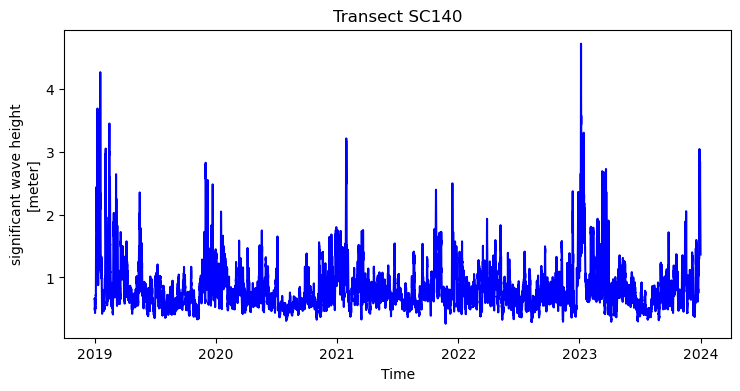

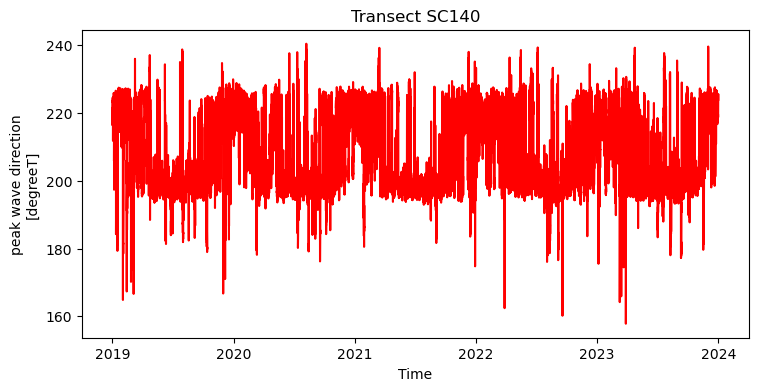

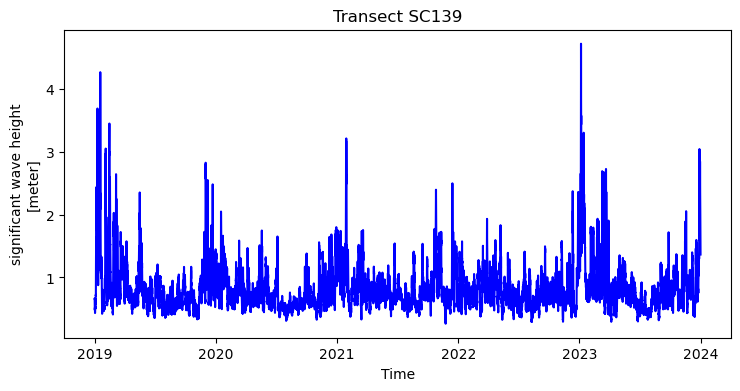

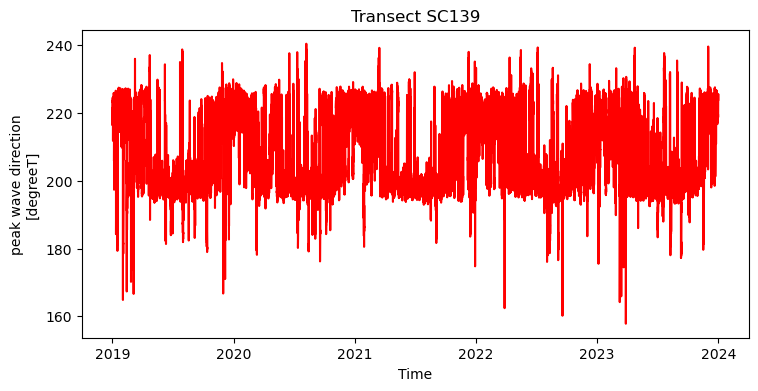

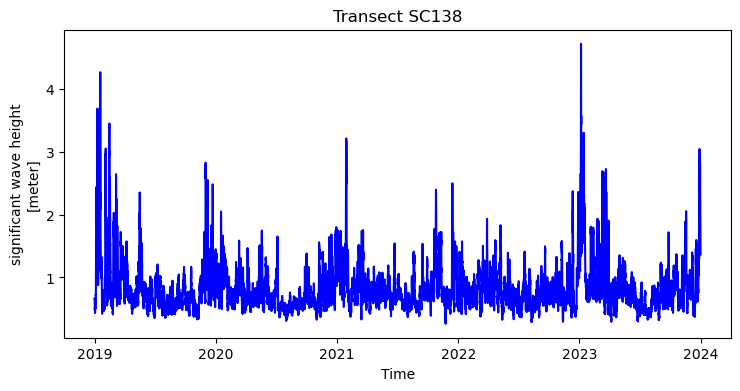

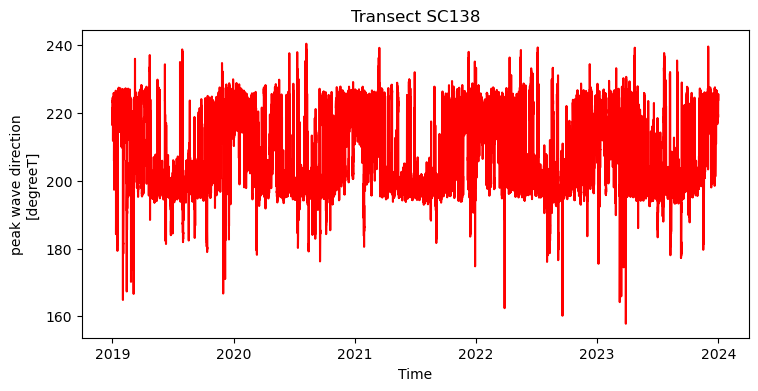

In [12]:
#transect1
plt.figure(figsize=(8.6, 4.0))
plt.plot(dstransect1_yr['waveTime'], dstransect1_yr['waveHs'], '-', color = 'blue')
plt.xlabel('Time')
plt.ylabel(dstransect1_yr['waveHs'].long_name+'\n['+dstransect1_yr['waveHs'].units+']')
plt.title('Transect SC140');

plt.figure(figsize=(8.6, 4.0))
plt.plot(dstransect1_yr['waveTime'], dstransect1_yr['waveDp'], '-', color = 'red')
plt.xlabel('Time')
plt.ylabel(dstransect1_yr['waveDp'].long_name+'\n['+dstransect1_yr['waveDp'].units+']')
plt.title('Transect SC140');

#transect2
plt.figure(figsize=(8.6, 4.0))
plt.plot(dstransect2_yr['waveTime'], dstransect2_yr['waveHs'], '-', color = 'blue')
plt.xlabel('Time')
plt.ylabel(dstransect2_yr['waveHs'].long_name+'\n['+dstransect2_yr['waveHs'].units+']')
plt.title('Transect SC139') ;

plt.figure(figsize=(8.6, 4.0))
plt.plot(dstransect2_yr['waveTime'], dstransect2_yr['waveDp'], '-', color = 'red')
plt.xlabel('Time')
plt.ylabel(dstransect2_yr['waveDp'].long_name+'\n['+dstransect2_yr['waveDp'].units+']')
plt.title('Transect SC139');

#transect3
plt.figure(figsize=(8.6, 4.0))
plt.plot(dstransect3_yr['waveTime'], dstransect3_yr['waveHs'], '-', color = 'blue')
plt.xlabel('Time')
plt.ylabel(dstransect3_yr['waveHs'].long_name+'\n['+dstransect3_yr['waveHs'].units+']')
plt.title('Transect SC138');

plt.figure(figsize=(8.6, 4.0))
plt.plot(dstransect3_yr['waveTime'], dstransect3_yr['waveDp'], '-', color = 'red')
plt.xlabel('Time')
plt.ylabel(dstransect3_yr['waveDp'].long_name+'\n['+dstransect3_yr['waveDp'].units+']')
plt.title('Transect SC138');

# Averaging the data to daily data

In [38]:
file_folder = 'C:\\Users\\Vhaid\\OneDrive\\Desktop\\MS 274\\Projects\\Shorelinechanges'
wind_timeseries = np.genfromtxt(os.path.join(file_folder,
                               'wave_data.csv'), delimiter=',', skip_header=1)

In [42]:
df = pd.read_csv("wave_data.csv")

# Display the first few rows to understand the structure
print(df.head())

def decimal_year_to_date(decimal_year):
    """Convert decimal year to a date (using January 1st as the base of the year)."""
    year = int(decimal_year)  # Get the integer part as the year
    fractional_year = decimal_year - year  # Get the fractional part
    days_in_year = 365.25  # Account for leap years (you can adjust if needed)
    day_of_year = fractional_year * days_in_year  # Calculate the day of the year
    return pd.Timestamp(year, 1, 1) + pd.to_timedelta(day_of_year, unit='D')  # Return the corresponding datetime

# Apply the conversion to 'decimal_years' column
df['datetime'] = df['DecimalYear'].apply(decimal_year_to_date)

# Check the new dataframe
print(df.head())

df['date'] = df['datetime'].dt.date

# Group by date and calculate the mean of the wave data (wave height, wave period, and wave direction)
daily_averages = df.groupby(['date', 'Transect']).agg({
    'WaveHeight': 'mean',
    'WavePeriod': 'mean',
    'WaveDirection': 'mean'
}).reset_index()

# Convert the 'date' back into decimal years for consistency in plotting
daily_averages['DecimalYear'] = daily_averages['date'].apply(lambda x: x.year + (x.timetuple().tm_yday - 1) / 365.25)

# Check the result
print(daily_averages.head())

   DecimalYear  Hour  WaveHeight  WavePeriod  WaveDirection   Transect
0       2019.0     0    0.662897    8.887934      221.43187  Transect3
1       2019.0     1    0.667027    8.851411      220.64069  Transect3
2       2019.0     2    0.656279    8.793456      220.33282  Transect3
3       2019.0     3    0.639475    8.866390      220.95793  Transect3
4       2019.0     4    0.615557    8.819167      220.46133  Transect3
   DecimalYear  Hour  WaveHeight  WavePeriod  WaveDirection   Transect  \
0       2019.0     0    0.662897    8.887934      221.43187  Transect3   
1       2019.0     1    0.667027    8.851411      220.64069  Transect3   
2       2019.0     2    0.656279    8.793456      220.33282  Transect3   
3       2019.0     3    0.639475    8.866390      220.95793  Transect3   
4       2019.0     4    0.615557    8.819167      220.46133  Transect3   

    datetime  
0 2019-01-01  
1 2019-01-01  
2 2019-01-01  
3 2019-01-01  
4 2019-01-01  
         date   Transect  WaveHeight  W

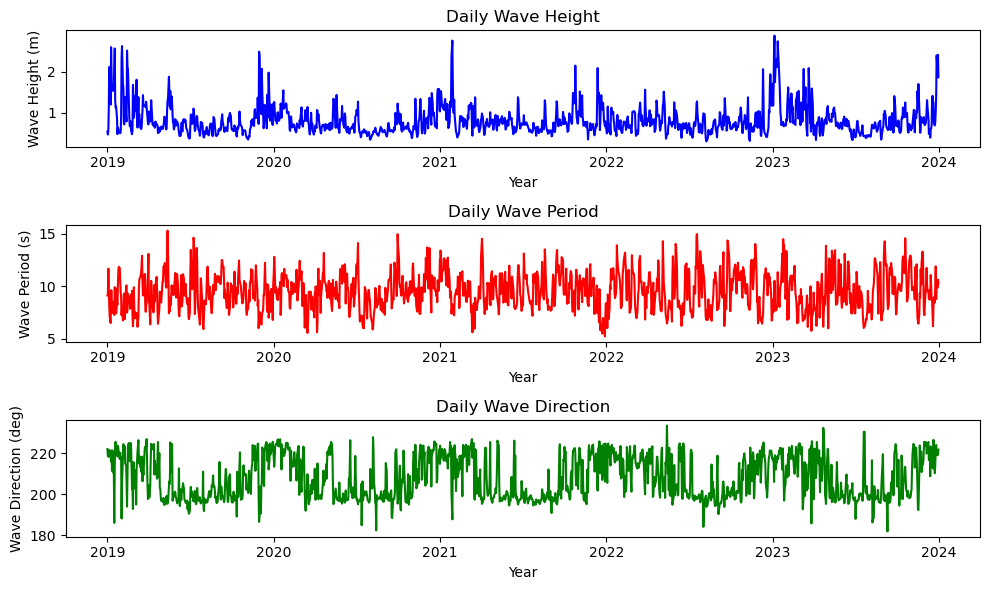

In [47]:
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(daily_averages['DecimalYear'], daily_averages['WaveHeight'], label="Wave Height (m)", color='blue')
plt.title("Daily Wave Height")
plt.xlabel("Year")
plt.ylabel("Wave Height (m)")

plt.subplot(3, 1, 2)
plt.plot(daily_averages['DecimalYear'], daily_averages['WavePeriod'], label="Wave Period (s)", color='red')
plt.title("Daily Wave Period")
plt.xlabel("Year")
plt.ylabel("Wave Period (s)")

plt.subplot(3, 1, 3)
plt.plot(daily_averages['DecimalYear'], daily_averages['WaveDirection'], label="Wave Direction (deg)", color='green')
plt.title("Daily Wave Direction")
plt.xlabel("Year")
plt.ylabel("Wave Direction (deg)")

plt.tight_layout()
plt.show()

# Putting it into a CSV

In [45]:
daily_averages.to_csv("averaged_daily_wave_data.csv", index=False)

print("Daily data saved to 'averaged_daily_wave_data.csv'")

Daily data saved to 'averaged_daily_wave_data.csv'
